# Practica II: Clasificación Multi-Clase

## Introducción
<div style="text-align: justify; margin-top:1.5em; margin-right:3em">Este cuaderno tiene como objetivo mostrar el siguiente tipo de problemas básicos que se encuentran en el Deep Learning, conocido como <b>Clasificación Multi-clase</b>. Al contrario que los problemas de clasificación binaria, los modelos generados deben ser capaces de dividir el espacio de estados en múltiples regiones. Cada una de estas regiones representa una clase distinta a las demás.</div>

Para comprender mejor este tipo de problemas vamos a resolver uno de ello.

## Contexto del problema
<div style="text-align: justify; margin-top:1.5em; margin-right:3em">Una entidad bancaria desea renovar sus sistemas informáticos para agilizar el proceso de gestión de los cheques. Para cumplir su objetivo necesitan que el ordenador sea capaz de reconocer los dígitos escritos a mano en los cheques. También contamos con que otro equipo se encargará de la parte del sistema que extrae los números escritos de las imágenes de los cheques, por lo que sólo debemos preocuparnos de desarrollar la parte del sistema que reconoce los dígitos de manera individual.</div>

In [1]:
# Import the required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

<div style="text-align: justify; margin-right:3em">El conjunto de datos que vamos a utilizar para resolver el problema será uno que ya viene junto con keras en el módulo <code>keras.datasets.mnist</code>.  Para utilizar estos datos hay que ejecutar la función <code>load_data()</code> que se encuentra dentro del módulo. Esta función devolverá dos tuplas correspondientes a los datos de entrenamiento y de prueba, respectivamente. Cada una de estas tuplas tiene la forma <code>(datos_entrada, salida_esperada)</code>.</div>

<div style="text-align: justify; margin-top:1.5em; margin-right:3em">Se ha elegido este <i>dataset</i> debido a que es ligero trabajar con él y contiene 60000 imágenes de entrenamiento y 10000 imágenes de prueba. La cantidad de datos lo hace más que aceptable para entrenar el modelo solicitado. Además, las imágenes se encuentran ya preprocesadas a un tamaño de 128x128 y en blanco y negro.</div>

In [2]:
n_classes = 10 # Number of classes the model has to predict
input_shape = (28, 28, 1) # Input shape of the images

# Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Convert the input images to a better range of values
x_train = x_train.astype('float32') / 255 
x_test = x_test.astype('float32') / 255   

# Expand the dimensions of the numpy array to match the input shape (28, 28) -> (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Use the function keras.utils.to_categorical(expected_output, num_classes) to adapt the expected output arrays 
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

print('Dataset:')
print('Train data:', x_train.shape)
print(' Test data:', x_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
Dataset:
Train data: (60000, 28, 28, 1)
 Test data: (10000, 28, 28, 1)


<div style="text-align: justify; margin-right:3em">Una vez se han cargado los datos y preprocesado para adecuarlos al verdadero procesamiento, vamos a desarrollar un modelo capaz de reconocer los dígitos. Debido a que las imágenes de entrada tienen un tamaño bastante reducido, no necesitaremos emplear muchas capaz de reducción <code>MaxPooling2D</code> para alcanzar un tamaño asequible de enviar a una red de neuronas <code>Dense</code>.</div>

<div style="text-align: justify; margin-top:1.5em; margin-right:3em">También debemos recordar que estamos tratando con un problema multi-clase y la capa de salida de la red debe tener tantas neuronas como clases queramos clasificar. Este tipo de problema también no lleva a tener que utilizar una <b>Función de Coste</b> diferente, en este caso: <b>Categorical Crossentropy</b>.</div>

In [3]:
# Create the base model
model = Sequential(name='mnist_classifier_model')

# Stack the convolutional layers with their pooling layers
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

# Flatten the output to adapt the to a dense network
model.add(Flatten())

# Stack the dense layers
model.add(Dense(32, activation='relu'))

# Stach the output layers of the model
model.add(Dense(n_classes, activation='softmax'))

# Compile the model with the apropiate loss function and optimizer
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.summary()

Model: "mnist_classifier_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                51232     
_________________________________________________________________
dense_1 (Dense)              (None, 10)     

<div style="text-align: justify; margin-right:3em">Ahora que hemos terminado de desarrollar el modelo, vamos a entrenarlo con los datos que se han cargado. Como ya hemos visto, usaremos la función <code>fit()</code> para configurar el proceso de entrenamiento. Debido a que la cantidad de datos es muy grande, tendremos que utilizar un tamaño de <i>batch</i> bastante alto. Se recomienda utilizar los siguientes parámetros de entrenamiento:</div>

- `batch_size=256`
- `epochs=20`
- `validation_split=0.1`

Ha diferencia del problema anterior, no se usará un generador para alimentar a la red. En su lugar utilizaremos directamente los datos de entrenamiento cargados al principio de este problema.

In [4]:
history = model.fit(x_train, y_train, batch_size=256, epochs=20, validation_split=0.1)

Epoch 1/20
211/211 [==============================] - 16s 75ms/step - loss: 2.2378 - accuracy: 0.2556 - val_loss: 1.5578 - val_accuracy: 0.6512
Epoch 2/20
211/211 [==============================] - 16s 74ms/step - loss: 1.1214 - accuracy: 0.7216 - val_loss: 0.4355 - val_accuracy: 0.8870
Epoch 3/20
211/211 [==============================] - 15s 73ms/step - loss: 0.4729 - accuracy: 0.8656 - val_loss: 0.3024 - val_accuracy: 0.9172
Epoch 4/20
211/211 [==============================] - 17s 78ms/step - loss: 0.3572 - accuracy: 0.8961 - val_loss: 0.2475 - val_accuracy: 0.9332
Epoch 5/20
211/211 [==============================] - 15s 72ms/step - loss: 0.3016 - accuracy: 0.9092 - val_loss: 0.2108 - val_accuracy: 0.9422
Epoch 6/20
211/211 [==============================] - 15s 70ms/step - loss: 0.2655 - accuracy: 0.9203 - val_loss: 0.1908 - val_accuracy: 0.9482
Epoch 7/20
211/211 [==============================] - 15s 71ms/step - loss: 0.2322 - accuracy: 0.9315 - val_loss: 0.1718 - val_accuracy:

A continuación se proporciona el código para ver las gráficas del entrenamiento realizado:

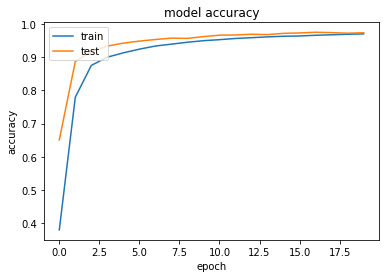

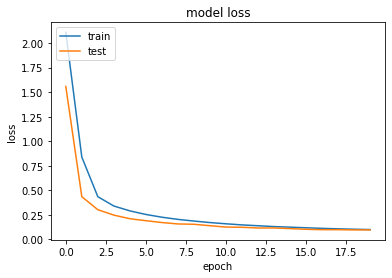

In [5]:
# Graficas del proceso de entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<div style="text-align: justify; margin-right:3em">Por útlimo, utilizaremos los datos de prueba para comprobar cómo de acertado es nuestro modelo con datos que todavía no ha visto. Para ello utilizaremos las función <code>evaluate(input_data, expected_output)</code>, esta función devolverá un array con los valores de la función de coste y de las métricas incluidas en el proceso de compulación del modelo.</div>

In [6]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09137777984142303
Test accuracy: 0.9728999733924866
